# Exercise 3 : Multi-layer Networks with Keras

### MNIST

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Load MNIST dataset

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [3]:
trainX.shape

(60000, 28, 28)

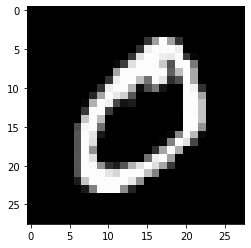

In [5]:
plt.imshow(trainX[1], cmap='gray')

In [9]:
trainX.min(), trainX.max()

(0, 255)

In [10]:
trainX = trainX / 255.0

In [13]:
testX.min(), testX.max()

(0.0, 1.0)

In [12]:
testX = testX / 255.0

In [14]:
trainX.shape

(60000, 28, 28)

In [15]:
trainX = trainX.reshape(-1, 28*28)

In [16]:
trainX.shape

(60000, 784)

In [17]:
testX = testX.reshape(-1, 28*28)

In [19]:
testX.shape, testX.min(), testX.max()

((10000, 784), 0.0, 1.0)

Change label to one-hot encoder

In [20]:
trainY[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
trainY = to_categorical(trainY)

In [23]:
testY = to_categorical(testY)

In [24]:
testY[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Define the 784-256-128-10 architecture using Keras

In [25]:
model = Sequential()

In [26]:
model.add(Dense(256, activation="sigmoid", input_shape=(784,)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [30]:
(256 + 1) * 128

32896

Train the model usign SGD

In [31]:
sgd = SGD(0.01)
model.compile(loss= "categorical_crossentropy", 
              optimizer=sgd,
              metrics=["accuracy"])

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
              epochs=100, batch_size=64, verbose=1)

In [34]:
(trainX.shape[0] / 64) * 100

93750.0

Evaluate the trained network

In [36]:
model.evaluate(testX, testY, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9410


[0.198931023478508, 0.9409999847412109]

In [39]:
predictions = model.predict(testX, batch_size=64)

Use `classification_report` to measure the performance of your model.

In [41]:
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.94      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.93      0.89      0.91       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Plot the training loss and accuracy

In [42]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
len(H.history['loss'])

100

In [45]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

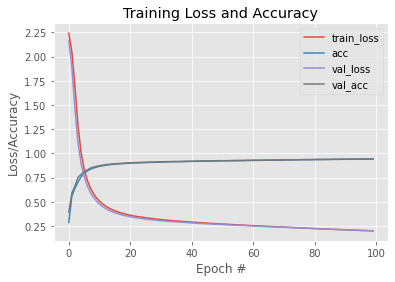

In [47]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()